In [1]:
import numpy as np

In [2]:
np.random.seed(1)
X1 = np.random.rand(200)*3
noise = np.random.normal(0, 0.2, X1.shape)
Y1 = np.sin(X1)+noise

X2 = X1 +1.5
Y2 = np.cos(X2) + noise
group1 = np.c_[X1, Y1, np.full(X1.shape[0], 0)]
group2 = np.c_[X2, Y2, np.full(X2.shape[0], 1)]
data = np.r_[group1, group2]

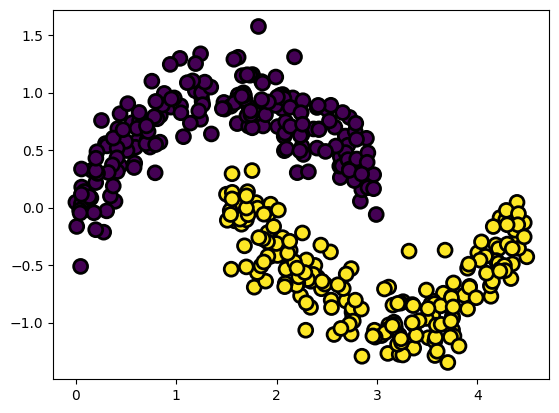

In [3]:
import matplotlib.pyplot as plt

plt.scatter(x=data[:,0], y=data[:,1],
            marker='o', c=data[:,2].astype(int),
            s=100, edgecolor='k', linewidth=2)
plt.show()

In [4]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.3, min_samples=10)
db.fit(data[:,0:2])

DBSCAN(eps=0.3, min_samples=10)

In [5]:
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

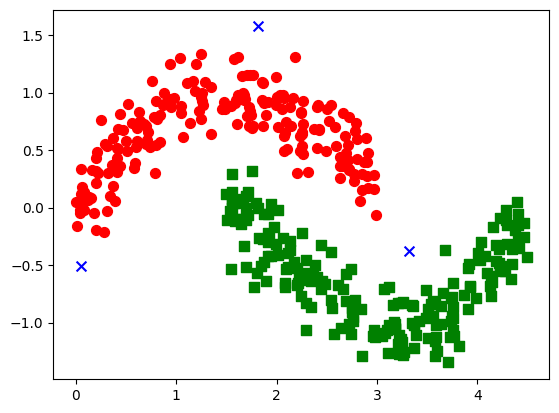

In [6]:
import matplotlib.pyplot as plt

colors = ['r', 'g']
markers = ['o', 's']
for i in range(n_clusters_):
    plt.scatter(x=data[db.labels_==i,0], y=data[db.labels_==i,1],
                s=50, marker=markers[i], c=colors[i])

plt.scatter(x=data[db.labels_==-1,0], y=data[db.labels_==-1,1],
                s=50, marker='x', c='b')
plt.show()